## **OpenCV algorithms for background substraction**: 
### _MOG, GMG, KNN and CNT_

- **MOG (Mixture of Gaussians):**
    - **Purpose**: Background subtraction algorithm.
    - **Explanation**: MOG models the background as a mixture of several Gaussian distributions. It adapts to changing conditions over time, making it suitable for dynamic scenes.
- **GMG (Global Motion-based Background Subtraction):**
    - **Purpose**: Background subtraction algorithm.
    - **Explanation**: GMG uses global motion information to model the background. It's particularly useful for scenarios with camera motion, as it adapts to both global and local changes.
- **KNN (K-Nearest Neighbors):**
    - **Purpose**: Background subtraction algorithm.
    - **Explanation**: KNN classifies each pixel as foreground or background based on the majority class of its K-nearest neighbors. It adapts well to varying lighting conditions and is computationally efficient.
- **CNT (Counting-based Tracker):**
    - **Purpose**: Object tracking algorithm.
    - **Explanation**: CNT tracks objects by counting pixel values over time. It is suitable for scenarios with varying object sizes and provides robust tracking performance. It is often used in combination with background subtraction for object detection and tracking.

In [1]:
import numpy as np
import cv2
import sys
from random import randint

In [2]:
TEXT_COLOR = (randint(0, 255), randint(0,255), randint(0,255))
BORDER_COLOR = (randint(0, 255), randint(0,255), randint(0,255))
FONT = cv2.FONT_HERSHEY_SIMPLEX
VIDEO_SOURCE = 'videos/Traffic_4.mp4'

In [3]:
# Controlling Which Algorithm to Use
BGS_TYPES = ['GMG', 'MOG2', 'MOG', 'KNN', 'CNT']

In [4]:
# Function to Retrieve Kernels (Matrices) for Use in Algorithms
# Receive a Parameter
# Return a Kernel

def getKernel(KERNEL_TYPE):
    if KERNEL_TYPE == 'dilation': 
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    if KERNEL_TYPE == 'opening':
        kernel = np.ones((3,3), np.uint8)
    if KERNEL_TYPE == 'closing':
        kernel = np.ones((3, 3), np.uint8)

    return kernel

In [5]:
# Noise Reduction (Convolution)
# Receive an image and the filter of interest
# Return the image with the applied filter

def getFilter(img, filter):
    if filter == 'closing':
        return cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel('closing'), iterations=2)
    if filter == 'opening':
        return cv2.morphologyEx(img, cv2.MORPH_OPEN, getKernel('opening'), iterations=2)
    if filter == 'dilation':
        return cv2.dilate(img, getKernel('dilation'), iterations=2)
    if filter == 'combine':
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, getKernel('closing'), iterations=2)
        opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, getKernel('opening'), iterations=2)
        dilation = cv2.dilate(opening, getKernel('dilation'), iterations=2)
        return dilation

In [6]:
# Apply the Chosen Algorithm for Background Subtraction on an Image

def getBGSubtractor(BGS_TYPE):
    if BGS_TYPE == 'GMG':
        return cv2.bgsegm.createBackgroundSubtractorGMG(initializationFrames = 120)
    if BGS_TYPE == 'MOG':
        return cv2.bgsegm.createBackgroundSubtractorMOG()
    if BGS_TYPE == 'MOG2':
        return cv2.createBackgroundSubtractorMOG2()
    if BGS_TYPE == 'KNN':
        return cv2.createBackgroundSubtractorKNN()
    if BGS_TYPE == 'CNT':
        return cv2.bgsegm.createBackgroundSubtractorCNT()
    print('Detector inválido')
    sys.exit(1)

In [14]:
cap = cv2.VideoCapture(VIDEO_SOURCE)
# 0 = GMG, 1 = MOG2, 2 = MOG, 3 = KNN,  4 = CNT
bg_subtractor = getBGSubtractor(BGS_TYPES[1])
BGS_TYPE = BGS_TYPES[1]

In [15]:
def main():
    while cap.isOpened():
        ok, frame = cap.read()
        #print(frame.shape)

        frame = cv2.resize(frame, (0,0), fx=0.5, fy=0.5)
        #print(frame.shape)

        bg_mask = bg_subtractor.apply(frame)
        fg_mask = getFilter(bg_mask, 'dilation')
        #fg_mask_closing = getFilter(bg_mask, 'closing')
        #fg_mask_opening = getFilter(bg_mask, 'opening')
        #fg_mask_combine = getFilter(bg_mask, 'combine')

        # https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html
        # https://www.pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/
        res = cv2.bitwise_and(frame, frame, mask=fg_mask)
        #res_closing = cv2.bitwise_and(frame, frame, mask=fg_mask_closing)
        #res_opening = cv2.bitwise_and(frame, frame, mask=fg_mask_opening)
        #res_combine = cv2.bitwise_and(frame, frame, mask=fg_mask_combine)
        #res2 = cv2.bitwise_and(frame, frame, mask=bg_mask)

        cv2.putText(res, 'Background subtractor: ' + BGS_TYPE, (10,50), FONT, 1, BORDER_COLOR, 3, cv2.LINE_AA)
        cv2.putText(res, 'Background subtractor: ' + BGS_TYPE, (10, 50), FONT, 1, TEXT_COLOR, 2, cv2.LINE_AA)

        if not ok:
            print('Erro')
            break

        if BGS_TYPE != 'MOG' and BGS_TYPE != 'GMG':
            cv2.imshow('Model', bg_subtractor.getBackgroundImage())

        cv2.imshow('Frame', frame)
        #cv2.imshow('BG mask', bg_mask)
        cv2.imshow('BG mask filter', fg_mask)
        cv2.imshow('Final dilation', res)
        #cv2.imshow('Final opening', res_opening)
        #cv2.imshow('Final closing', res_closing)
        #cv2.imshow('Final combine', res_combine)

        #cv2.imshow('Final sem pré', res2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

In [16]:
main()

## **Results:**

### **BG type: MOG2**

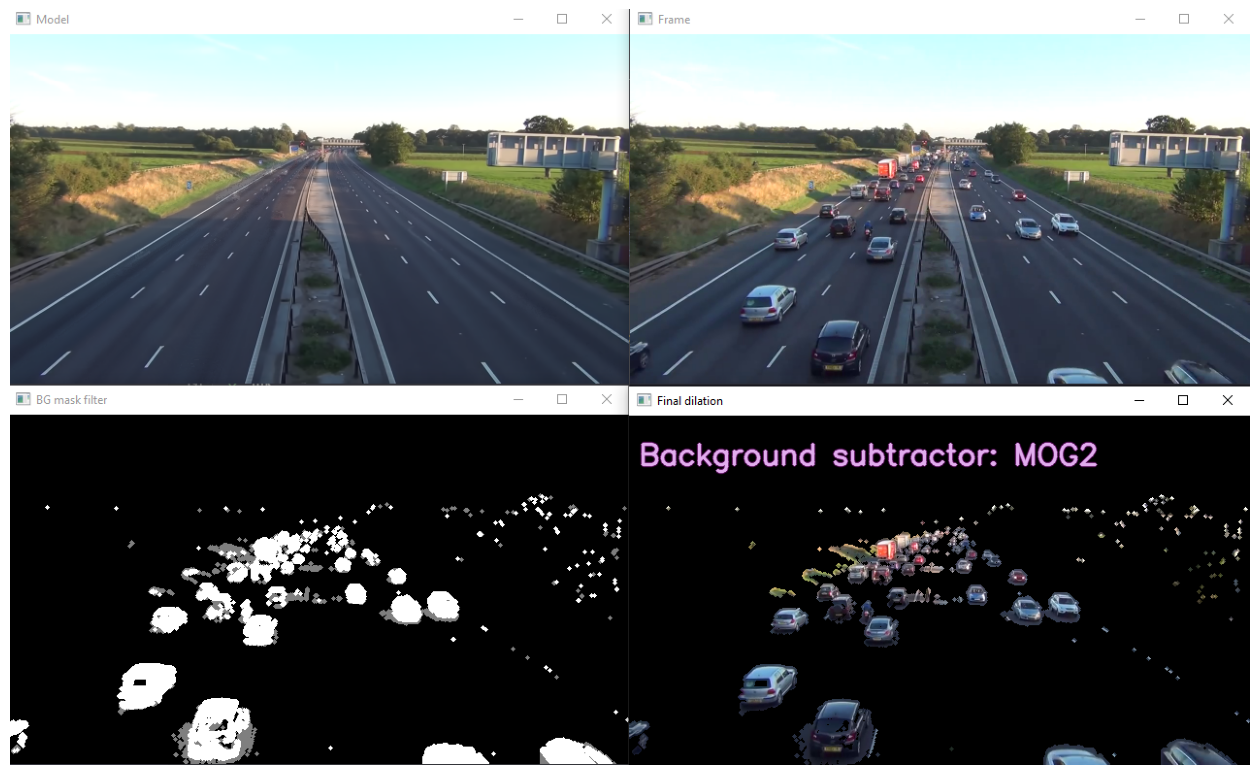

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
image_path = "images/final-dilatation-mog2.png"  
img = mpimg.imread(image_path)

# Set the figure size
fig = plt.figure(figsize=(16, 25))  

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()